In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats as st

# Задание
Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.
Файл доступен тут -
https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing

Признаки:

1.satisfaction_level - Уровень удовлетворенности работой

2.Last_evaluation - Время с момента последней оценки в годах

3.number_projects - Количество проектов, выполненных за время работы

4.average_monthly_hours - Среднее количество часов на рабочем месте в месяц

5.time_spend_company - Стаж работы в компании в годах

6.work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником

7.left - уволился ли сотрудник

8.promotion_last_5years - повышался ли сотрудник за последние пять лет

9.department - отдел в котором работает сотрудник

10.salary - относительный уровень зарплаты

Загрузите файл HR.csv в pandas dataframe

In [2]:
df = pd.read_csv('HR.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


Рассчитайте основные статистики для переменных.

In [3]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.Определите две самые скоррелированные и две наименее скоррелированные переменные.

In [4]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


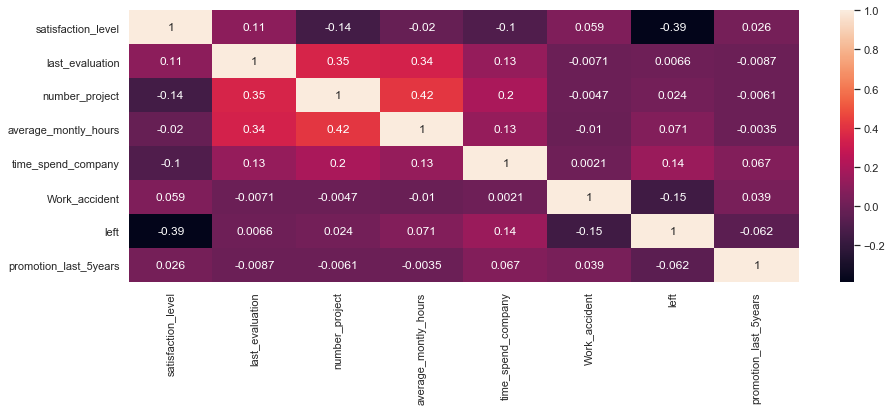

In [5]:
sns.set(rc={'figure.figsize':(15,5)})
sns.heatmap(df.corr(), annot=True)

Две самые скоррелированные переменные: average_monthly_hours и number_projects

Две наименее скоррелированные переменные.: Work_accident и time_spend_company

Рассчитайте сколько сотрудников работает в каждом
департаменте.

In [6]:
df['department'].value_counts().reset_index()

,index,department
0,sales,4140
1,technical,2720
2,support,2229
3,IT,1227
4,product_mng,902
5,marketing,858
6,RandD,787
7,accounting,767
8,hr,739
9,management,630


Показать распределение сотрудников по зарплатам.

In [7]:
df['salary'].value_counts().reset_index()

,index,salary
0,low,7316
1,medium,6446
2,high,1237


Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности.

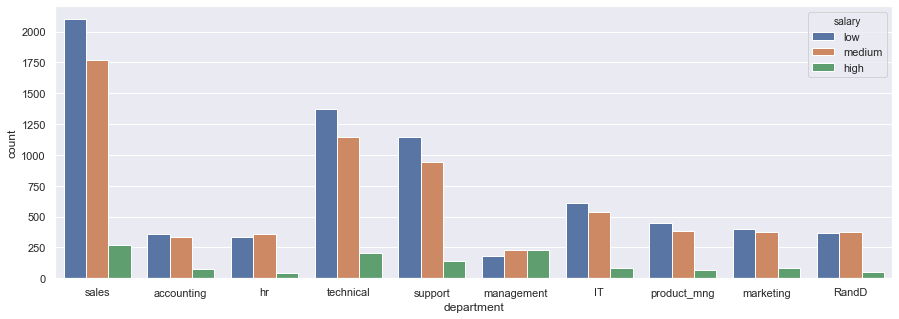

In [8]:
sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(x = 'department', hue = 'salary', data = df)

Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [9]:
st.ttest_ind(df.loc[df['salary'] == 'low']['average_montly_hours'], df.loc[df['salary'] == 'high']['average_montly_hours'], equal_var=False)

Ttest_indResult(statistic=0.7624331665385475, pvalue=0.4459045542257889)

Гипотеза верна.

Рассчитать следующие показатели среди уволившихся:

● Доля сотрудников с повышением за последние 5 лет

In [10]:
left = df.loc[df['left'] == 1]
left.loc[left['promotion_last_5years'] == 1].count()[0]/left.count()[0]

0.005320638476617194

● Средняя степень удовлетворенности

In [11]:
left["satisfaction_level"].mean()

0.44009801176140917

● Среднее количество проектов

In [12]:
left["number_project"].mean()

3.8555026603192384

Рассчитать следующие показатели среди не уволившихся:

● Доля сотрудников с повышением за последние 5 лет

In [13]:
left0 = df.loc[df['left'] == 0]
left0.loc[left0['promotion_last_5years'] == 1].count()[0]/left0.count()[0]

0.026251312565628283

● Средняя степень удовлетворенности

In [15]:
left0["satisfaction_level"].mean()

0.666809590479516

● Среднее количество проектов

In [17]:
left0["number_project"].mean()

3.786664333216661